In [1]:
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from numpy import array
from numpy import argmax
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
import pandas as pd

In [ ]:
input_data = pd.read_csv('file:///home/ubuntu/ML/book_file.csv')
print(input_data)

In [3]:
from pyspark.sql import SparkSession 
 
spark_session = SparkSession.builder\
        .master("spark://host-192-168-2-139:7077") \
        .appName("Linus app")\
        .config("spark.dynamicAllocation.enabled", True)\
        .config("spark.dynamicAllocation.shuffleTracking.enabled",True)\
        .config("spark.shuffle.service.enabled", False)\
        .config("spark.dynamicAllocation.executorIdleTimeout","30s")\
        .config("spark.cores.max", 2)\
        .config("spark.ui.reverseProxy", True)\
        .config("spark.ui.reverseProxyUrl", "http://130.238.28.204:4040/")\
        .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/03/13 13:32:45 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
#csv_file = spark_session.read.csv('file:///home/ubuntu/musicdata/')
csv_file = spark_session.read.csv('file:///home/ubuntu/musicdata/').rdd\
    .map(lambda x : [float(c) for c in x[1:-1]]).cache()\
    .toDF()
print(csv_file.head())

23/03/13 13:33:50 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
23/03/13 13:33:50 WARN DAGScheduler: Broadcasting large task binary with size 1758.2 KiB


Row(_1=0.0, _2=0.0, _3=4.0, _4=4.0, _5=0.0, _6=0.0, _7=2.0, _8=0.0, _9=0.0, _10=0.0, _11=4.0, _12=4.0, _13=0.0, _14=0.0, _15=0.0, _16=0.0, _17=0.0, _18=0.0, _19=4.0, _20=0.0, _21=0.0, _22=0.0, _23=0.0, _24=0.0, _25=0.0, _26=0.0, _27=0.0, _28=2.0, _29=0.0, _30=0.0, _31=0.0, _32=0.0, _33=0.0, _34=2.0, _35=0.0, _36=0.0, _37=0.0, _38=0.0, _39=0.0, _40=0.0, _41=0.0, _42=0.0, _43=0.0, _44=0.0, _45=0.0, _46=2.0, _47=0.0, _48=0.0, _49=0.0, _50=0.0, _51=0.0, _52=0.0, _53=0.0, _54=0.0, _55=0.0, _56=0.0, _57=0.0, _58=0.0, _59=0.0, _60=0.0, _61=0.0, _62=0.0, _63=0.0, _64=0.0, _65=0.0, _66=0.0, _67=0.0, _68=0.0, _69=0.0, _70=0.0, _71=0.0, _72=2.0, _73=0.0, _74=0.0, _75=0.0, _76=0.0, _77=0.0, _78=0.0, _79=0.0, _80=0.0, _81=0.0, _82=0.0, _83=0.0, _84=0.0, _85=0.0, _86=0.0, _87=0.0, _88=0.0, _89=2.0, _90=0.0, _91=0.0, _92=0.0, _93=0.0, _94=0.0, _95=0.0, _96=0.0, _97=0.0, _98=0.0, _99=0.0, _100=0.0, _101=0.0, _102=0.0, _103=0.0, _104=0.0, _105=0.0, _106=0.0, _107=0.0, _108=0.0, _109=0.0, _110=0.0, _111

In [3]:
import pandas as pd

In [5]:
labels_file = pd.read_table('file:///home/ubuntu/ML/labels.txt')
labels = labels_file.columns[0]
print(labels)

trackid,generaid,i,the,you,to,and,a,me,it,not,in,my,is,of,your,that,do,on,are,we,am,will,all,for,no,be,have,love,so,know,this,but,with,what,just,when,like,now,que,time,can,come,de,there,go,up,oh,la,one,they,out,down,get,she,was,see,if,got,never,from,he,feel,want,let,make,way,say,take,would,as,ca,day,at,babi,away,life,yeah,y,back,by,her,heart,here,how,could,night,need,our,look,where,en,eye,thing,world,more,caus,gonna,die,right,been,tell,think,un,who,el,through,man,live,again,give,too,onli,te,tri,tu,or,whi,se,keep,dream,well,mind,an,wo,still,us,his,long,mi,girl,wanna,find,fall,around,good,about,some,over,littl,turn,hand,then,noth,light,said,call,everi,alway,were,did,into,e,wait,leav,home,had,hold,run,es,walk,ever,them,lie,face,end,hear,gone,head,believ,everyth,ya,has,cri,alon,yo,hey,their,le,someth,si,insid,du,befor,o,word,stay,place,much,chang,ich,god,stand,these,better,last,friend,soul,anoth,je,left,new,him,than,stop,tonight,burn,sun,off,por,lo,play,thought,sing,show,lost,peopl,made,br

In [6]:
labels_list = labels.split(',')
labels_list = labels_list[1:-1]
print(type(labels_list))

<class 'list'>


In [7]:
print(len(labels_list))

5000


In [8]:
csv_file = csv_file.toDF(*labels_list)

In [9]:
csv_file.first()

23/03/13 13:34:15 WARN DAGScheduler: Broadcasting large task binary with size 2.6 MiB


Row(generaid=0.0, i=0.0, the=4.0, you=4.0, to=0.0, and=0.0, a=2.0, me=0.0, it=0.0, not=0.0, in=4.0, my=4.0, is=0.0, of=0.0, your=0.0, that=0.0, do=0.0, on=0.0, are=4.0, we=0.0, am=0.0, will=0.0, all=0.0, for=0.0, no=0.0, be=0.0, have=0.0, love=2.0, so=0.0, know=0.0, this=0.0, but=0.0, with=0.0, what=2.0, just=0.0, when=0.0, like=0.0, now=0.0, que=0.0, time=0.0, can=0.0, come=0.0, de=0.0, there=0.0, go=0.0, up=2.0, oh=0.0, la=0.0, one=0.0, they=0.0, out=0.0, down=0.0, get=0.0, she=0.0, was=0.0, see=0.0, if=0.0, got=0.0, never=0.0, from=0.0, he=0.0, feel=0.0, want=0.0, let=0.0, make=0.0, way=0.0, say=0.0, take=0.0, would=0.0, as=0.0, ca=0.0, day=2.0, at=0.0, babi=0.0, away=0.0, life=0.0, yeah=0.0, y=0.0, back=0.0, by=0.0, her=0.0, heart=0.0, here=0.0, how=0.0, could=0.0, night=0.0, need=0.0, our=0.0, look=2.0, where=0.0, en=0.0, eye=0.0, thing=0.0, world=0.0, more=0.0, caus=0.0, gonna=0.0, die=0.0, right=0.0, been=0.0, tell=0.0, think=0.0, un=0.0, who=0.0, el=0.0, through=0.0, man=0.0, l

In [53]:
csv_file.select(csv_file.columns[:20]).show()

23/03/13 11:48:08 WARN DAGScheduler: Broadcasting large task binary with size 1934.2 KiB


+--------+----+----+----+----+----+----+---+----+----+----+---+---+----+----+----+----+----+---+----+
|generaid|   i| the| you|  to| and|   a| me|  it| not|  in| my| is|  of|your|that|  do|  on|are|  we|
+--------+----+----+----+----+----+----+---+----+----+----+---+---+----+----+----+----+----+---+----+
|     0.0| 0.0| 4.0| 4.0| 0.0| 0.0| 2.0|0.0| 0.0| 0.0| 4.0|4.0|0.0| 0.0| 0.0| 0.0| 0.0| 0.0|4.0| 0.0|
|     8.0| 5.0| 6.0| 0.0| 3.0| 1.0| 7.0|0.0| 8.0| 2.0| 1.0|0.0|4.0| 3.0| 0.0| 0.0| 2.0| 0.0|1.0| 1.0|
|     0.0|16.0| 3.0|16.0|10.0| 6.0| 4.0|0.0| 0.0| 4.0| 0.0|2.0|2.0| 2.0| 4.0| 5.0| 2.0|15.0|1.0| 0.0|
|     0.0|17.0| 5.0| 7.0| 2.0| 1.0| 0.0|2.0| 1.0| 4.0| 4.0|0.0|5.0| 0.0| 0.0| 3.0| 6.0| 0.0|4.0|11.0|
|     0.0|38.0| 4.0| 2.0| 6.0| 4.0| 6.0|0.0| 8.0| 8.0| 7.0|7.0|5.0| 0.0| 0.0| 5.0| 2.0| 0.0|1.0| 1.0|
|     6.0| 2.0|14.0| 0.0|11.0| 3.0| 3.0|0.0| 3.0| 0.0| 5.0|4.0|3.0|11.0| 1.0| 4.0| 0.0| 1.0|0.0| 1.0|
|     5.0| 0.0| 0.0| 0.0| 0.0| 0.0| 4.0|0.0| 0.0| 0.0| 0.0|0.0|0.0| 0.0| 0.0| 0.0|

In [10]:
csv_file.printSchema()

root
 |-- generaid: double (nullable = true)
 |-- i: double (nullable = true)
 |-- the: double (nullable = true)
 |-- you: double (nullable = true)
 |-- to: double (nullable = true)
 |-- and: double (nullable = true)
 |-- a: double (nullable = true)
 |-- me: double (nullable = true)
 |-- it: double (nullable = true)
 |-- not: double (nullable = true)
 |-- in: double (nullable = true)
 |-- my: double (nullable = true)
 |-- is: double (nullable = true)
 |-- of: double (nullable = true)
 |-- your: double (nullable = true)
 |-- that: double (nullable = true)
 |-- do: double (nullable = true)
 |-- on: double (nullable = true)
 |-- are: double (nullable = true)
 |-- we: double (nullable = true)
 |-- am: double (nullable = true)
 |-- will: double (nullable = true)
 |-- all: double (nullable = true)
 |-- for: double (nullable = true)
 |-- no: double (nullable = true)
 |-- be: double (nullable = true)
 |-- have: double (nullable = true)
 |-- love: double (nullable = true)
 |-- so: double (nulla

In [11]:
from pyspark.ml.feature import VectorAssembler

ignore = ['generaid', "don`t", "i`m", "can`t"]
assembler = VectorAssembler(
    inputCols=[x for x in csv_file.columns if x not in ignore],
    outputCol='features')

data_assembled = assembler.transform(csv_file)

In [79]:
print(data_assembled.head())

23/03/13 12:03:06 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB


Row(generaid=0.0, i=0.0, the=4.0, you=4.0, to=0.0, and=0.0, a=2.0, me=0.0, it=0.0, not=0.0, in=4.0, my=4.0, is=0.0, of=0.0, your=0.0, that=0.0, do=0.0, on=0.0, are=4.0, we=0.0, am=0.0, will=0.0, all=0.0, for=0.0, no=0.0, be=0.0, have=0.0, love=2.0, so=0.0, know=0.0, this=0.0, but=0.0, with=0.0, what=2.0, just=0.0, when=0.0, like=0.0, now=0.0, que=0.0, time=0.0, can=0.0, come=0.0, de=0.0, there=0.0, go=0.0, up=2.0, oh=0.0, la=0.0, one=0.0, they=0.0, out=0.0, down=0.0, get=0.0, she=0.0, was=0.0, see=0.0, if=0.0, got=0.0, never=0.0, from=0.0, he=0.0, feel=0.0, want=0.0, let=0.0, make=0.0, way=0.0, say=0.0, take=0.0, would=0.0, as=0.0, ca=0.0, day=2.0, at=0.0, babi=0.0, away=0.0, life=0.0, yeah=0.0, y=0.0, back=0.0, by=0.0, her=0.0, heart=0.0, here=0.0, how=0.0, could=0.0, night=0.0, need=0.0, our=0.0, look=2.0, where=0.0, en=0.0, eye=0.0, thing=0.0, world=0.0, more=0.0, caus=0.0, gonna=0.0, die=0.0, right=0.0, been=0.0, tell=0.0, think=0.0, un=0.0, who=0.0, el=0.0, through=0.0, man=0.0, l

In [12]:
from pyspark.ml.classification import LogisticRegression

In [13]:
lr = LogisticRegression(maxIter=10, regParam=0.01, labelCol="generaid")
print("LogisticRegression parameters:\n" + lr.explainParams() + "\n")

LogisticRegression parameters:
aggregationDepth: suggested depth for treeAggregate (>= 2). (default: 2)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0)
family: The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial (default: auto)
featuresCol: features column name. (default: features)
fitIntercept: whether to fit an intercept term. (default: True)
labelCol: label column name. (default: label, current: generaid)
lowerBoundsOnCoefficients: The lower bounds on coefficients if fitting under bound constrained optimization. The bound matrix must be compatible with the shape (1, number of features) for binomial regression, or (number of classes, number of features) for multinomial regression. (undefined)
lowerBoundsOnIntercepts: The lower bounds on intercepts if fitting under bound constrained op

In [29]:
training, test = data_assembled.randomSplit([0.8, 0.2])

In [14]:
model1 = lr.fit(training)

23/03/13 13:36:27 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB


23/03/13 13:41:35 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB


23/03/13 13:41:35 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB


23/03/13 13:42:16 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB


23/03/13 13:42:17 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
23/03/13 13:42:17 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS
23/03/13 13:42:17 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB


23/03/13 13:42:18 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB


23/03/13 13:42:18 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB


23/03/13 13:42:19 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB


23/03/13 13:42:19 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB


23/03/13 13:42:20 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB


23/03/13 13:42:20 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
23/03/13 13:42:21 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
23/03/13 13:42:21 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB


23/03/13 13:42:21 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
23/03/13 13:42:22 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB


23/03/13 13:42:22 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
23/03/13 13:42:23 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
23/03/13 13:42:23 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
23/03/13 13:42:24 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB


23/03/13 13:42:24 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
23/03/13 13:42:25 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB


23/03/13 13:42:25 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB


23/03/13 13:42:25 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
23/03/13 13:42:26 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
23/03/13 13:42:26 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB
23/03/13 13:42:27 WARN DAGScheduler: Broadcasting large task binary with size 2.4 MiB


print("Coefficients: " + str(model1.coefficients))
print("Intercept: " + str(model1.intercept))

In [15]:
print("Coefficients: " + str(model1.coefficientMatrix))
print("Intercept: " + str(model1.interceptVector))

Coefficients: DenseMatrix([[-5.39626985e-05,  6.68337225e-03,  1.99584263e-03, ...,
               1.83690888e-01, -1.63848457e-01, -2.69457068e-01],
             [ 3.15044707e-03,  6.29161945e-03,  6.02083664e-04, ...,
               6.74583615e-02,  2.33492785e-01,  4.58674132e-01],
             [-7.57867677e-04, -5.11095750e-04, -5.64810936e-04, ...,
              -1.39019032e-02, -2.25596771e-03,  4.94351926e-03],
             ...,
             [-4.17923695e-03, -1.24388146e-03, -4.39053896e-03, ...,
              -6.97347184e-02, -2.26687988e-02,  3.47164600e-02],
             [-2.08474684e-03, -2.00405376e-03, -1.99915386e-03, ...,
               2.05858953e-01,  1.33496913e-02, -1.94375771e-02],
             [-1.20936809e-03, -6.61024971e-04, -9.57498101e-04, ...,
              -5.09934297e-03, -5.54256178e-03, -1.40489712e-02]])
Intercept: [2.7748626540736177,-1.3659851748930913,-0.515925085942509,0.3891719421566467,1.318514743190152,-0.03942223400854017,1.1234142049177251,-0.4

In [21]:
trainingSummary = model1.summary

23/03/13 13:50:24 WARN DAGScheduler: Broadcasting large task binary with size 3.0 MiB


0.6543938961973418


In [56]:
logisitc_accuracy = trainingSummary.accuracy*100
print(trainingSummary.accuracy*100)

65.43938961973417


In [23]:
output_data = model1.transform(data_assembled)

In [26]:
print(output_data.select("features", "prediction", "generaid").show(20))

23/03/13 13:55:36 WARN DAGScheduler: Broadcasting large task binary with size 3.0 MiB


+--------------------+----------+--------+
|            features|prediction|generaid|
+--------------------+----------+--------+
|(4997,[1,2,5,9,10...|       0.0|     0.0|
|(4997,[0,1,3,4,5,...|       0.0|     8.0|
|(4997,[0,1,2,3,4,...|       0.0|     0.0|
|(4997,[0,1,2,3,4,...|       0.0|     0.0|
|(4997,[0,1,2,3,4,...|       0.0|     0.0|
|(4997,[0,1,3,4,5,...|       6.0|     6.0|
|(4997,[5,16,37,41...|       5.0|     5.0|
|(4997,[0,1,2,3,4,...|       0.0|     7.0|
|(4997,[5,6,22,23,...|       0.0|     0.0|
|(4997,[37,41,46,8...|       9.0|     9.0|
|(4997,[0,1,2,3,4,...|       0.0|     0.0|
|(4997,[0,2,3,4,5,...|       0.0|     0.0|
|(4997,[0,1,2,3,5,...|       5.0|     5.0|
|(4997,[6,21,22,71...|       0.0|     0.0|
|(4997,[1,3,4,5,7,...|       9.0|     9.0|
|(4997,[1,2,3,4,5,...|       0.0|     0.0|
|(4997,[0,1,2,3,4,...|       1.0|     1.0|
|(4997,[0,1,2,3,4,...|       7.0|     7.0|
|(4997,[5,6,23,37,...|       2.0|     2.0|
|(4997,[1,2,3,4,5,...|       6.0|     6.0|
+----------

In [27]:
from pyspark.ml.classification import DecisionTreeClassifier

In [30]:
tree = DecisionTreeClassifier(labelCol="generaid")
tree_model = tree.fit(training)

23/03/13 13:59:26 WARN DAGScheduler: Broadcasting large task binary with size 3.6 MiB


23/03/13 14:01:44 WARN DAGScheduler: Broadcasting large task binary with size 3.6 MiB


23/03/13 14:01:52 WARN DAGScheduler: Broadcasting large task binary with size 3.6 MiB


23/03/13 14:02:43 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB


23/03/13 14:03:38 WARN DAGScheduler: Broadcasting large task binary with size 4.0 MiB


23/03/13 14:07:29 WARN DAGScheduler: Broadcasting large task binary with size 4.0 MiB


23/03/13 14:07:32 WARN DAGScheduler: Broadcasting large task binary with size 4.0 MiB


23/03/13 14:07:33 WARN DAGScheduler: Broadcasting large task binary with size 4.0 MiB


23/03/13 14:07:35 WARN DAGScheduler: Broadcasting large task binary with size 4.0 MiB


In [31]:
tree_trainingSummary = tree_model.summary

AttributeError: 'DecisionTreeClassificationModel' object has no attribute 'summary'

In [91]:
print(tree_trainingSummary.accuracy)

In [32]:
tree2 = DecisionTreeClassifier(labelCol="generaid")
tree_model2 = tree.fit(training)

23/03/13 14:11:47 WARN DAGScheduler: Broadcasting large task binary with size 3.6 MiB


23/03/13 14:19:11 WARN DAGScheduler: Broadcasting large task binary with size 3.6 MiB


23/03/13 14:19:19 WARN DAGScheduler: Broadcasting large task binary with size 3.6 MiB


23/03/13 14:20:11 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB


23/03/13 14:21:07 WARN DAGScheduler: Broadcasting large task binary with size 4.0 MiB


23/03/13 14:25:02 WARN DAGScheduler: Broadcasting large task binary with size 4.0 MiB


23/03/13 14:25:04 WARN DAGScheduler: Broadcasting large task binary with size 4.0 MiB


23/03/13 14:25:05 WARN DAGScheduler: Broadcasting large task binary with size 4.0 MiB


23/03/13 14:25:07 WARN DAGScheduler: Broadcasting large task binary with size 4.0 MiB


In [43]:
tree_predictions = tree_model2.transform(training)

In [40]:
from pyspark.sql import functions as F

In [41]:
tree_predictions.select("features", "prediction", "generaid").sort(F.col('generaid').desc()).show(20)

23/03/13 14:37:20 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB


+--------------------+----------+--------+
|            features|prediction|generaid|
+--------------------+----------+--------+
|(4997,[1,4,5,9,23...|       0.0|    14.0|
|(4997,[1,6,7,9,11...|       0.0|    14.0|
|(4997,[0,1,2,3,4,...|       0.0|    14.0|
|(4997,[45,2061,23...|       0.0|    14.0|
|(4997,[9,242,404,...|       0.0|    14.0|
|(4997,[0,1,2,5,6,...|       0.0|    14.0|
|(4997,[323,1225,1...|       0.0|    14.0|
|(4997,[0,2,3,4,6,...|       0.0|    14.0|
|(4997,[0,1,2,3,4,...|       0.0|    14.0|
|(4997,[6,19,2432]...|       0.0|    14.0|
|(4997,[1,3,4,7,11...|       0.0|    14.0|
|(4997,[0,1,2,3,4,...|       0.0|    14.0|
|(4997,[5,6,9,27,4...|       0.0|    14.0|
|(4997,[8,15,78,12...|       0.0|    14.0|
|(4997,[0,1,2,4,5,...|       0.0|    14.0|
|(4997,[0,1,2,3,4,...|       0.0|    14.0|
|(4997,[6,78,536,9...|       0.0|    14.0|
|(4997,[0,1,3,4,7,...|       0.0|    14.0|
|(4997,[1,3,4,5,6,...|       0.0|    14.0|
|(4997,[0,1,2,3,4,...|       0.0|    14.0|
+----------

In [44]:

tree_predictions.select("features", "prediction", "generaid").show(5)

23/03/13 14:44:55 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB


+--------------------+----------+--------+
|            features|prediction|generaid|
+--------------------+----------+--------+
|(4997,[3243,4974]...|       0.0|     0.0|
| (4997,[1813],[1.0])|       0.0|     0.0|
|(4997,[892,1258,1...|       0.0|     0.0|
|(4997,[462,558,58...|       0.0|     0.0|
|(4997,[242,427,48...|       0.0|     0.0|
+--------------------+----------+--------+
only showing top 5 rows



In [62]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(
    labelCol="generaid", predictionCol="prediction", metricName="accuracy")
tree_accuracy = evaluator.evaluate(tree_predictions)

23/03/13 15:08:32 WARN DAGScheduler: Broadcasting large task binary with size 3.7 MiB


In [63]:
print(tree_accuracy)

0.5031712833069768


In [48]:
from pyspark.ml.classification import NaiveBayes

In [49]:
nb = NaiveBayes(smoothing=1.0, modelType="multinomial")

In [50]:
bayes_model = nb.fit(training)

23/03/13 14:52:25 WARN DAGScheduler: Broadcasting large task binary with size 3.6 MiB


23/03/13 14:53:18 WARN DAGScheduler: Broadcasting large task binary with size 5.0 MiB


In [54]:
bayes_predictions = bayes_model.transform(test)


23/03/13 14:59:19 WARN DAGScheduler: Broadcasting large task binary with size 4.0 MiB


+--------------------+----------+--------+
|            features|prediction|generaid|
+--------------------+----------+--------+
|(4997,[886,950,18...|       5.0|     0.0|
|(4997,[788,1139,2...|       6.0|     0.0|
|(4997,[116,295,30...|       6.0|     0.0|
|(4997,[79,127,210...|       0.0|     0.0|
|(4997,[45,358,959...|       6.0|     0.0|
+--------------------+----------+--------+
only showing top 5 rows



In [55]:
bayes_predictions.select("features", "prediction", "generaid").show(10)

23/03/13 15:00:20 WARN DAGScheduler: Broadcasting large task binary with size 4.0 MiB


+--------------------+----------+--------+
|            features|prediction|generaid|
+--------------------+----------+--------+
|(4997,[886,950,18...|       5.0|     0.0|
|(4997,[788,1139,2...|       6.0|     0.0|
|(4997,[116,295,30...|       6.0|     0.0|
|(4997,[79,127,210...|       0.0|     0.0|
|(4997,[45,358,959...|       6.0|     0.0|
|(4997,[41,46,176,...|       0.0|     0.0|
|(4997,[37,41,76,1...|       0.0|     0.0|
|(4997,[37,41,46,7...|       0.0|     0.0|
|(4997,[27,96,121,...|       7.0|     0.0|
|(4997,[23,37,46,7...|       6.0|     0.0|
+--------------------+----------+--------+
only showing top 10 rows



In [57]:
bayes_evaluator = MulticlassClassificationEvaluator(labelCol="generaid", predictionCol="prediction",
                                              metricName="accuracy")
bayes_accuracy = bayes_evaluator.evaluate(bayes_predictions)
print("Test set accuracy = " + str(bayes_accuracy))

23/03/13 15:05:42 WARN DAGScheduler: Broadcasting large task binary with size 4.0 MiB


Test set accuracy = 0.4967003367003367


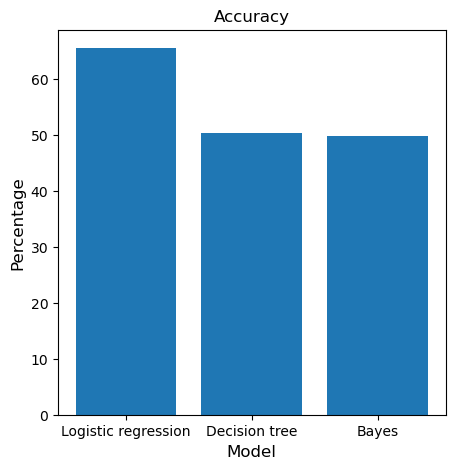

In [66]:
plt.figure(figsize=(5, 5))
x_input = ['Logistic regression', 'Decision tree', 'Bayes']
y_input = [logisitc_accuracy, tree_accuracy*100, bayes_accuracy*100]
plt.bar(x_input, y_input)
plt.title('Accuracy')
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.show()